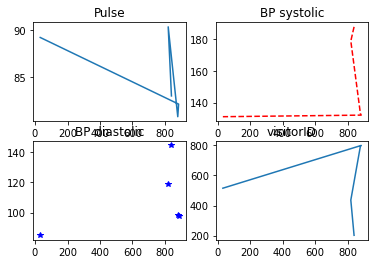

In [39]:
# 61 Plot a graph by multiplotting on the same canvas (Take any set of x & y values).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("HospitalDatabase.xlsx", "AmbulatoryVisits")
x = (df["PatientMRN"].head()).to_list()
y1 = (df["Pulse"].head()).to_list()
y2 = (df["BloodPressureSystolic"].head()).to_list()
y3 = (df["BloodPressureDiastolic"].head()).to_list()
y4 = (df["VisitID"].head()).to_list()
fig,a =  plt.subplots(2,2)

a[0][0].plot(x,y1)
a[0][0].set_title('Pulse')
a[0][1].plot(x,y2, 'r--')
a[0][1].set_title('BP systolic')
a[1][0].plot(x,y3, 'b*')
a[1][0].set_title('BP diastolic')
a[1][1].plot(x,y4)
a[1][1].set_title('visitorID')
plt.show()

In [40]:
# 62 Display the data for all 'White Female' patients above the age of 50.
import pandas as pd
import numpy as np
import datetime as dt
df=pd.read_excel("HospitalDatabase.xlsx", "Patients")
dfs = df[df['Gender']=='Female']
df_white = dfs[dfs['Race']=='White']
df_white["age"] = ((dt.datetime.now()-df_white["DateOfBirth"]).astype ('<m8[Y]'))
display(df_white.loc[(df_white.age) > 50.0])

C:\Users\honey\AppData\Local\Temp\ipykernel_19912\220984548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white["age"] = ((dt.datetime.now()-df_white["DateOfBirth"]).astype ('<m8[Y]'))


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,54.0
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,61.0
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,61.0
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56.0
42,43,Ryan,Angear,1971-09-14 05:59:22.112,Female,White,Spanish,51.0
...,...,...,...,...,...,...,...,...
864,865,Giovanni,Borland,1960-12-01 13:16:18.100,Female,White,English,61.0
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,51.0
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55.0
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53.0


In [36]:
# 63 Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
import pandas as pd
import numpy as np
df=pd.read_excel("HospitalDatabase.xlsx", "Patients")
df.loc[102:199, ["FirstName", "LastName"]]

,FirstName,LastName
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
106,Myrtia,Pow
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


In [5]:
# 64 "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)"

import numpy as np
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
c = np.matmul(a, b)
print(c)

[[10 13]
 [28 40]]


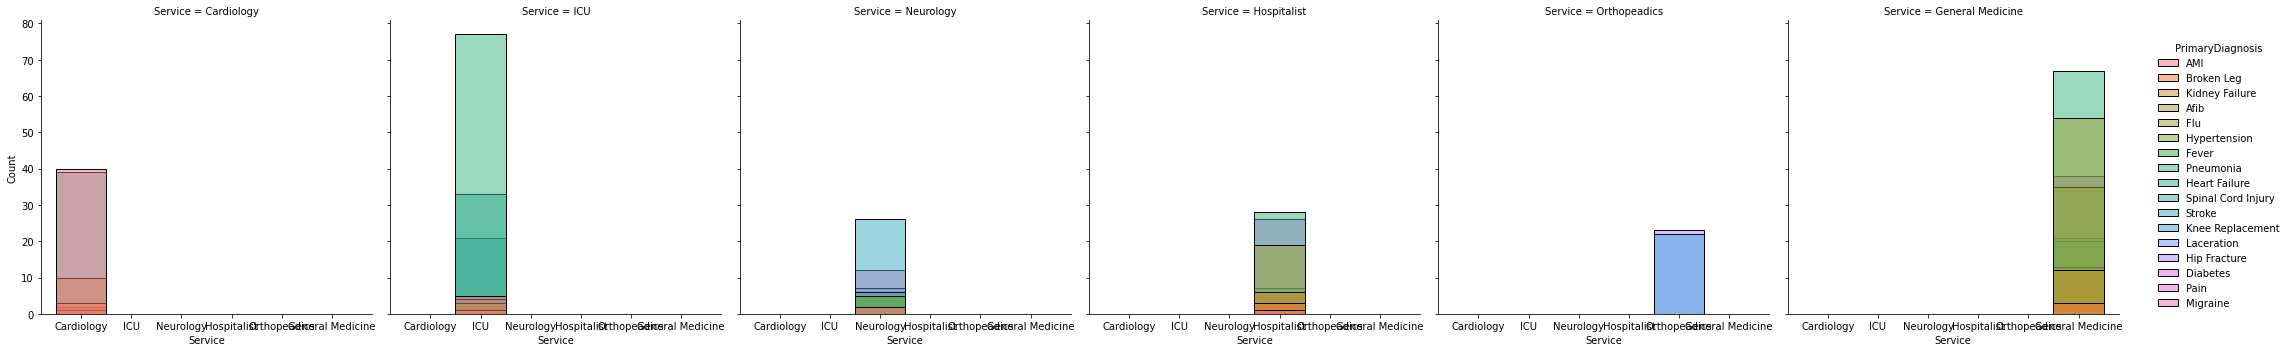

In [6]:
# 65	Get the  number of patients based on service and primary diagnosis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
df.groupby(["Service","PrimaryDiagnosis"]).size()
sns.displot(data = df, x = df["Service"], hue = df["PrimaryDiagnosis"], col =df["Service"], kde = False)


In [7]:
# 66 np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.
import numpy as np
a = np.arange(1,31).reshape(6,5)
ele_4 = a[0,3]
print(ele_4)
ele_5 = a[0,4]
print(ele_5)
ele_24 = a[4,3]
print(ele_24)
ele_25 = a[4,4]
print(ele_25)
ele_29 = a[5,3]
print(ele_29)
ele_30 = a[5,4]
print(ele_30)

4
5
24
25
29
30


In [8]:
# 67 Make a pivot table by the no. of patients from the admission date till discharge date.
import pandas as pd
import numpy as np
import datetime as dt
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
df['Discharge_date'] = pd.to_datetime(df['DischargeDate']).dt.date
pivot = pd.pivot_table(df,values = 'PatientID', index=['AdmissionDate','Discharge_date'],aggfunc='count')
print(pivot)

                              PatientID
AdmissionDate Discharge_date           
2018-01-01    2018-01-04              3
              2018-01-05              2
              2018-01-06              1
              2018-01-07              3
              2018-01-08              1
...                                 ...
2018-02-22    2018-03-05              1
              2018-03-06              1
              2018-03-07              4
              2018-03-08              2
              2018-03-10              2

[459 rows x 1 columns]


In [9]:
# 68	Display the data where actual LOS is greater than expected LOS
import pandas as pd
import numpy as np
import datetime as dt
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
df[["DischargeDate","AdmissionDate"]] = df[["DischargeDate","AdmissionDate"]].apply(pd.to_datetime)
df["los"] = round((df["DischargeDate"]-df["AdmissionDate"])/np.timedelta64(1, 'D'))
df["los_diff"]= df["los"] - round(df["ExpectedLOS"]) 
display(df.loc[(df.los_diff) > 0])

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,los,los_diff
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12.0,5.0
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,9.0,6.0
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,16.0,13.0
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9.0,4.0
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6.0,2.0
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8.0,3.0
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11.0,2.0
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13.0,2.0


In [10]:
# 69 Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.
import pandas as pd
import numpy as np
df=pd.read_excel("HospitalDatabase.xlsx", "Patients")
Name = []
final_list = []
Name = (df ['FirstName']+" "+df["LastName"])
Name = np.unique(Name).tolist()
string = 'lau'
for n in Name:
    if string.lower() in n.lower():        
        final_list.append(n)
print(final_list)

['Jerrilyn Klausen', 'Lauren Foort', 'Lauren Gaskal', 'Lemmy Klausen', 'Zulauf Alvar', 'Zulauf Bitcheno', 'Zulauf Ellingham', 'Zulauf LLC', 'Zulauf Manske', "Zulauf O'Shavlan", 'Zulauf Orbine']


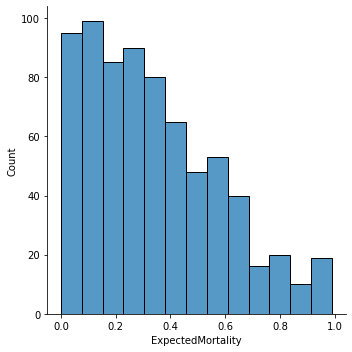

In [11]:
# 70	Plot a graph to show the distribution of expected mortality.
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
sns.displot(df["ExpectedMortality"])

Pneumonia             177
Flu                    80
Heart Failure          78
Stroke                 68
Diabetes               64
Hypertension           50
AMI                    48
Laceration             29
Knee Replacement       23
Hip Fracture           23
Kidney Failure         20
Fever                  19
Migraine               12
Afib                   11
Broken Leg              9
Pain                    7
Spinal Cord Injury      2
Name: PrimaryDiagnosis, dtype: int64

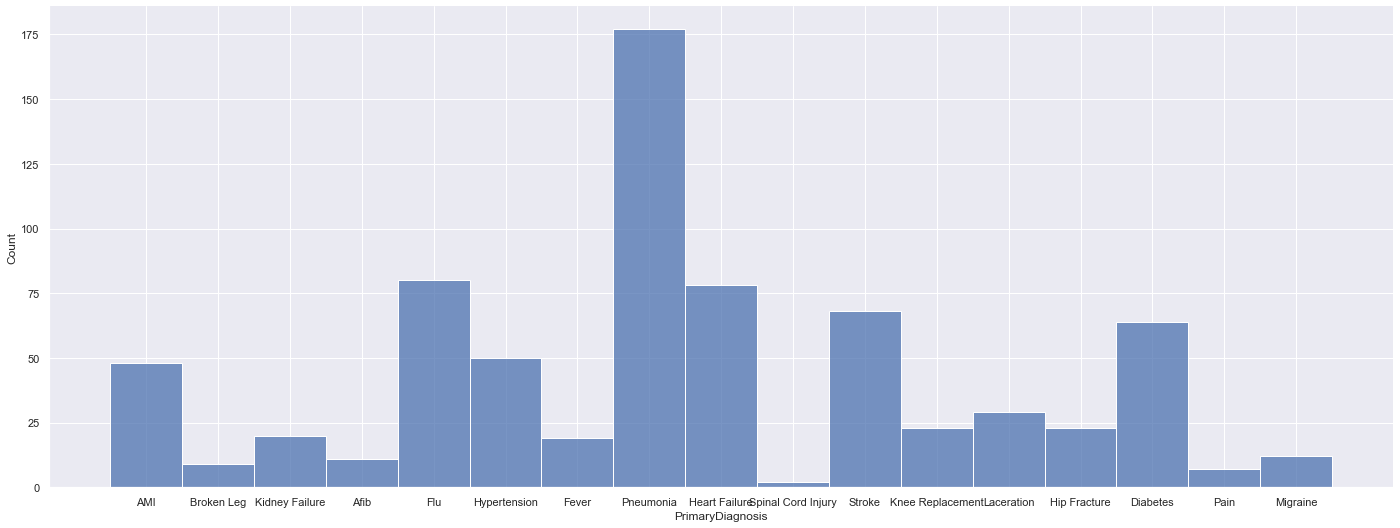

In [48]:
# 71	Create a visualization on the count of patients based on primary diagnosis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
count_PD = df["PrimaryDiagnosis"].value_counts()

sns.displot(df["PrimaryDiagnosis"] )
plt.gcf().set_size_inches(23, 8)
display(count_PD)

In [27]:
# 72: List male patients over the age of 60 who have undergone surgery from January-March 2019.


import pandas as pd
import numpy as np
import datetime as dt
df=pd.read_excel("HospitalDatabase.xlsx", "Patients")
dfs = df[df['Gender']=='Male']
dfs["age"] = ((dt.datetime.now()-dfs["DateOfBirth"]).astype ('<m8[Y]'))
dfs = (dfs.loc[(dfs.age) > 60.0])
patient = dfs.loc[:,["PatientID","FirstName","LastName"]]

ef = pd.read_excel("HospitalDatabase.xlsx", "AmbulatoryVisits")
str_d = (ef["DateofVisit"].dt.date)
diff1=[]
diff2=[]
import datetime as datetime
for x in str_d:
    str_d1 = str(x) 
    str_d2 = '01/01/2019'
    str_d3 = '04/01/2019'
    # convert string to date object
    d1 = dt.datetime.strptime(str_d1, "%Y-%m-%d")
    d2 = dt.datetime.strptime(str_d2, "%m/%d/%Y")
    d3 = dt.datetime.strptime(str_d3, "%m/%d/%Y")
    diff1.append((d1-d2).days)
    diff2.append((d1-d3).days)

ef["diff1"] = diff1
ef["diff2"] = diff2
efs = (ef.loc[(ef.diff1) > -1])
efss = (efs.loc[(efs.diff2) < 0])

patient_provider = efss.loc[:,["ProviderID","PatientMRN"]]    
merged_1 = pd.merge(left=patient, right=patient_provider, left_on='PatientID', right_on='PatientMRN')

gf  = pd.read_excel("HospitalDatabase.xlsx", "Providers")
gf = gf.loc[:,["ProviderID","ProviderSpecialty"]]
table = (pd.concat([merged_1, gf], 
                  axis = 1))
tb = table[table['ProviderSpecialty']=='Surgery']
t =tb.dropna()
t = t.loc[:,["FirstName","LastName"]]
patt = t.drop_duplicates()
print("List male patients over the age of 60 who have undergone surgery from January-March 2019:")
print(patt)

C:\Users\honey\AppData\Local\Temp\ipykernel_19912\1616998413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["age"] = ((dt.datetime.now()-dfs["DateOfBirth"]).astype ('<m8[Y]'))


List male patients over the age of 60 who have undergone surgery from January-March 2019:
  FirstName LastName
9     Berta    Loxly


In [28]:
# 73	Delete the column 'DischargeDispostion' iteratively.

import pandas as pd
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
discharge = []
discharge = (df["DischargeDisposition"]).to_list()
x = range(0,len(discharge),1)
for i in x:
    discharge.pop()
print(discharge)


[]


In [29]:
# 74 Get the list of ReasonForVisit.
import pandas as pd
import numpy as np
df=pd.read_excel("HospitalDatabase.xlsx", "EDVisits")
visit_reason = []
visit_reason = df["ReasonForVisit"]
visit_reason = np.unique(visit_reason).tolist()
print(visit_reason)


['Accident', 'Bleeding', 'Car Accident', 'Chest Pain', 'Cough', 'Fever', 'Gun Shot', 'Intoxication', 'Laceration', 'Migraine', 'Pneumonia', 'Shortness of Breath', 'Stomach Ache']


In [30]:
# 75	Calculate the time spent in ED Department for each visit.

import pandas as pd
import numpy as np
import datetime as dt
df=pd.read_excel("HospitalDatabase.xlsx", "EDVisits")
df["LOS"] = ((df["EDDischargeTime"]-df["VisitDate"])/np.timedelta64(1, 'h'))
print(df["LOS"])

0       11.339701
1       23.238949
2        1.848931
3        1.336054
4        2.638901
          ...    
1194    15.885959
1195    22.451119
1196     4.500985
1197     6.176404
1198    10.824050
Name: LOS, Length: 1199, dtype: float64


In [31]:
# 76	Reverse the string without using inbuilt functions.

def rev(a):
    string = ""
    for i in a:
        string = i + string
    return string
  
a = "hospital_data"
b = rev(a)
print("String is : %s" %a)  
print("The reversed string is : %s" %b)

String is : hospital_data
The reversed string is : atad_latipsoh


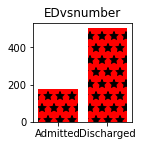

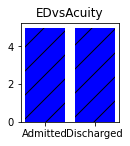

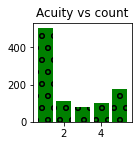

In [32]:
# 77 Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel("HospitalDatabase.xlsx", "EDVisits")
df = df.loc[:,["Acuity", "EDDisposition", "PatientID"]]
df = (df.drop_duplicates())

count = df.groupby(["EDDisposition", "Acuity"]).size().to_dict()
ED = list(count.keys())
number = list(count.values())
ED =[]
Acuity =[]
for e, a in count:
    ED.append(e)
    Acuity.append(a)
hatch =['*','/','o']
plt.subplot(2,3,1)
plt.title("EDvsnumber")
bar1 = plt.bar(ED,number,color='r')
for i in range(len(bar1)):
    bar1[i].set(hatch = hatch[0], fill=True)
plt.show()
plt.subplot(2,3,2)
plt.title("EDvsAcuity")
bar2 = plt.bar(ED,Acuity,color='b')
for i in range(len(bar2)):
    bar2[i].set(hatch = hatch[1], fill=True)
plt.show()

plt.subplot(2,3,4)
plt.title("Acuity vs count")
bar3 = plt.bar(Acuity,number,color='g')
for i in range(len(bar3)):
    bar3[i].set(hatch = hatch[2], fill=True)
plt.show()


In [33]:
# 78 Find reasonForVisit with highest count of acuity 5 patients.
import pandas as pd
import numpy as np
df=pd.read_excel("HospitalDatabase.xlsx", "EDUnique")
a = df.query('Acuity == 5')
b = a.filter(['ReasonForVisit'])
count  = b.groupby('ReasonForVisit').size().to_dict()
for key, val in count.items():
        if val == b.groupby('ReasonForVisit').size().max():
            print("The reason of visit with highest count of Acuity 5 patients is %s with count %s" %(key,val))


The reason of visit with highest count of Acuity 5 patients is Chest Pain with count 53


In [34]:
# 79 Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?
import pandas as pd
import numpy as np
df=pd.read_excel("HospitalDatabase.xlsx", "Discharges")
diagnosis = []
diagnosis = (df["PrimaryDiagnosis"])
Expected_LOS = df["ExpectedLOS"]
diagnosis1 = (np.unique(diagnosis)).tolist()
df.groupby('PrimaryDiagnosis')['ExpectedLOS'].apply(lambda g: g.max() - g.min())
x1 = ((df.groupby('PrimaryDiagnosis')['ExpectedLOS'].apply(lambda g: g.max() - g.min()))).tolist()
x2  = ((df.groupby('PrimaryDiagnosis')['ExpectedLOS'].apply(lambda g: g.max() - g.min())).max())
diag_dict = {}
diag_dict = {diagnosis1[i]: x1[i] for i in range(len(diagnosis1))}
for key, val in diag_dict.items():
        if val == x2:
            print("PrimaryDiagnosis that has the biggest difference between maximum and minimum Expected LOS is %s with the difference %s" %(key,val))

PrimaryDiagnosis that has the biggest difference between maximum and minimum Expected LOS is Pneumonia with the difference 14.834260065410472


In [35]:
# 80 Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).
import pandas as pd
import numpy as np
df=pd.read_excel("HospitalDatabase.xlsx", "Providers")
a = df.groupby(["ProviderSpecialty"]).count().to_dict()
provider_list =[]
for x,y in a.items():
    for i,j in y.items():
        provider_list.append(i)
provider_list = np.unique(provider_list).tolist()
print("The list of unique groups in provider speciality: %s" %provider_list)

The list of unique groups in provider speciality: ['Cardiology', 'Pediatrics', 'PrimaryCare', 'Surgery']
